In [1]:
import numpy as np
import matplotlib.pyplot as ax
from scipy.stats import lognorm
import seaborn as sns
import matplotlib.pyplot as ax
import warnings
import pandas as pd
import matplotlib.pyplot as plt


# https://i.unu.edu/media/ias.unu.edu-en/project/2238/E-waste-Guidelines_Partnership_2015.pdf
_mu = "\u03BC"
_lam = "\u03BB"
_sig = "\u03C3"

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set(font = "times new roman",
        style = "whitegrid",
        font_scale= 1)

# read file

df= pd.read_excel("weibull.xlsx")

df = df[df["Plot"]==1]
df


,Cat,Full Name,alpha,beta,short,Plot
0,301,"Small IT (f.i. routers, mice, keyboards, exter...",1.3,5.9,Small IT,1
1,302,"Desktop PCs (excl. monitors, accessoires)",2.1,9.6,PC,1
2,303,Laptops (incl. tablets),1.5,5.2,Laptop,1
6,307,"Professional IT (f.i. servers, routers, data s...",1.5,7.8,Prof. IT,1
8,309,"Flat Display Panel Monitors (LCD, LED)",2.5,7.5,Flat Screen,1


<Axes: xlabel='x'>

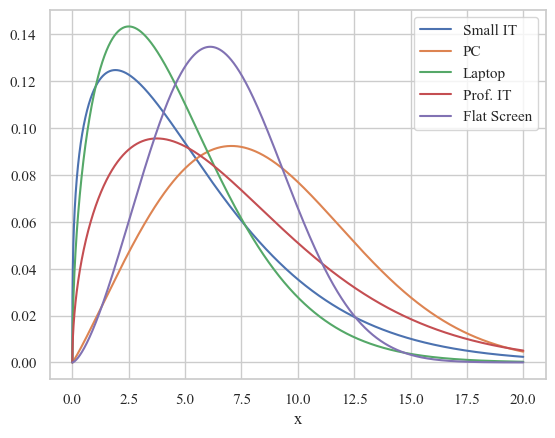

In [2]:
from scipy.stats import weibull_min

# Generate random data for lognormal distribution
data = {}
x = np.linspace(0, 20, 10000)
data["x"]=x
for i, row in df.iterrows():
    key = row["short"]
    alpha = row["alpha"]
    beta = row["beta"]
    y = weibull_min.pdf(x, alpha, scale=beta)
    data[key]= y


df_w = pd.DataFrame.from_dict(data)
df_w.set_index("x", inplace=True)
df_w.plot()

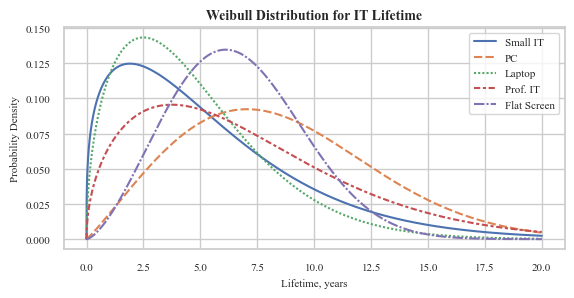

In [3]:

cm = 1/2.54 
# Create histogram of the generated data
fig,ax = plt.subplots(figsize=(15*cm, 8*cm))
ax.set_xlabel('Lifetime, years',fontsize=8)
ax.set_ylabel('Probability Density',fontsize=8)
ax.set_title(f'Weibull Distribution for IT Lifetime', 
             fontsize=10, fontweight= "bold")
ax.grid(True)

# Overlay the probability density function (pdf) of the lognormal distribution

sns.lineplot(data=df_w, ax = ax)
ax.legend(fontsize=8)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(8)

fig.tight_layout()
fig.show()
fig.savefig("weibull.png", dpi=600)

In [4]:
alpha = 1.7
beta = 7.8

maximum_position = beta * ((alpha - 1) / alpha) ** (1 / alpha)
print("Position of the maximum:", maximum_position)

Position of the maximum: 4.628258566553934


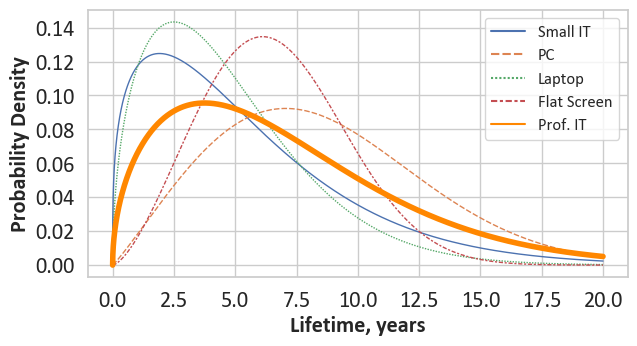

In [5]:
# Create histogram of the generated data
#4.7 8.3
FONTSIZE = 16
sns.set(font = "calibri",
        style = "whitegrid",
        font_scale= 1)
fig,ax = plt.subplots(figsize=(16.6*cm, 9.2*cm))
ax.set_xlabel('Lifetime, years',fontsize=FONTSIZE)
ax.set_ylabel('Probability Density',fontsize=FONTSIZE)
# ax.set_title(f'Weibull Distribution for IT Lifetime', 
#              fontsize=10, fontweight= "bold")
ax.grid(True)

# Overlay the probability density function (pdf) of the lognormal distribution
c1 = [c for c in df_w.columns if "Prof" not in c]
c2 = [c for c in df_w.columns if c not in c1]
sns.lineplot(data=df_w[c1], ax = ax, linewidth=1)
sns.lineplot(data=df_w[c2], ax = ax, linewidth=4, palette=["#ff8700"])
ax.legend(fontsize=FONTSIZE*0.75)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(FONTSIZE)
plt.xlabel("Lifetime, years", fontweight="bold")
plt.ylabel("Probability Density", fontweight="bold")
fig.tight_layout()
fig.show()
fig.savefig("weibull_ppt.png", dpi=600)